# Analyzing CIFAR-10 using Convolutional Neural Networks - Initial Results

In [1]:
%pylab inline

import numpy
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import LocallyConnected2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

K.set_image_dim_ordering('th')

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## What is the CIFAR-10 dataset anyway?

#### It's a dataset that consists of 60000 32x32 colored images divided into 10 classes that correspond to 6000 images each. 

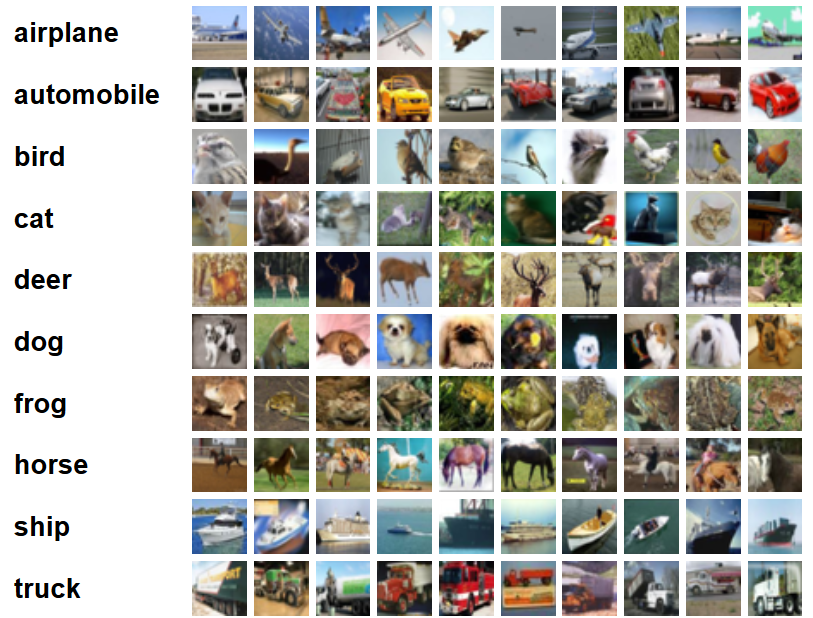

#### Our goal right now is to train a Convolutional Neural Network that could accurately classify these images.

In [3]:
seed = 7
numpy.random.seed(seed)

In [4]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#### Let's start with a basic model

Our initial model will consist of a Conv layer, followed by RELU activation layer, max pooling, dropout and then fully connected layers. 

In [5]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
model.add(MaxPooling2D(pool_size=(8, 8)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 10s - loss: 1.6687 - acc: 0.3946 - val_loss: 1.4194 - val_acc: 0.4948
Epoch 2/40
 - 9s - loss: 1.4165 - acc: 0.4930 - val_loss: 1.2963 - val_acc: 0.5409
Epoch 3/40
 - 9s - loss: 1.3185 - acc: 0.5312 - val_loss: 1.2040 - val_acc: 0.5721
Epoch 4/40
 - 9s - loss: 1.2540 - acc: 0.5575 - val_loss: 1.1486 - val_acc: 0.6000
Epoch 5/40
 - 9s - loss: 1.2084 - acc: 0.5735 - val_loss: 1.1340 - val_acc: 0.6092
Epoch 6/40
 - 9s - loss: 1.1716 - acc: 0.5889 - val_loss: 1.1115 - val_acc: 0.6063
Epoch 7/40
 - 9s - loss: 1.1437 - acc: 0.5992 - val_loss: 1.0840 - val_acc: 0.6226
Epoch 8/40
 - 9s - loss: 1.1178 - acc: 0.6051 - val_loss: 1.0702 - val_acc: 0.6252
Epoch 9/40
 - 9s - loss: 1.0926 - acc: 0.6146 - val_loss: 1.0436 - val_acc: 0.6395
Epoch 10/40
 - 9s - loss: 1.0763 - acc: 0.6244 - val_loss: 1.0628 - val_acc: 0.6289
Epoch 11/40
 - 9s - loss: 1.0564 - acc: 0.6288 - val_loss: 1.0296 - val_acc: 0.6424
Epoch 12/40
 - 9s - loss: 1.0412 -

#### Now, ~66% accuracy isn't that bad to start with.

Looking at other people's successful models, we know that we could do a lot more to improve this. Let's start by adding a second convolutional layer to our initial setup.

In [6]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(8, 8)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 12s - loss: 1.5471 - acc: 0.4348 - val_loss: 1.2380 - val_acc: 0.5626
Epoch 2/40
 - 11s - loss: 1.2473 - acc: 0.5553 - val_loss: 1.1151 - val_acc: 0.6101
Epoch 3/40
 - 12s - loss: 1.1401 - acc: 0.5962 - val_loss: 1.0650 - val_acc: 0.6228
Epoch 4/40
 - 12s - loss: 1.0721 - acc: 0.6213 - val_loss: 1.0016 - val_acc: 0.6466
Epoch 5/40
 - 11s - loss: 1.0178 - acc: 0.6400 - val_loss: 0.9782 - val_acc: 0.6649
Epoch 6/40
 - 11s - loss: 0.9794 - acc: 0.6551 - val_loss: 0.9355 - val_acc: 0.6703
Epoch 7/40
 - 12s - loss: 0.9459 - acc: 0.6669 - val_loss: 0.9405 - val_acc: 0.6686
Epoch 8/40
 - 12s - loss: 0.9194 - acc: 0.6722 - val_loss: 0.9121 - val_acc: 0.6844
Epoch 9/40
 - 11s - loss: 0.8969 - acc: 0.6845 - val_loss: 0.9115 - val_acc: 0.6799
Epoch 10/40
 - 11s - loss: 0.8761 - acc: 0.6896 - val_loss: 0.8961 - val_acc: 0.6869
Epoch 11/40
 - 11s - loss: 0.8533 - acc: 0.6973 - val_loss: 0.8878 - val_acc: 0.6903
Epoch 12/40
 - 11s - los

#### Oh wow! An improvement of ~5%! 

*But we can do better. We have the technology.*

Notice that our validation accuracy has stopped improving at around the 25th-30th epoch and has only been fluctuating slightly around its peak value with no drastic change. We're wasting resources by continuing to train the model with no significant improvement. At worst, it can lead to overfitting and may actually pull our model's performance down.

---

Introducting the concept of **Early Stopping**.

We can have the model stop training after an arbitrary amount of epochs with no improvement, thus saving some valuable time and resources and preventing the model from overfitting on the training data. 
***

#### Why do we Early Stop?

Ideally, this is what a training error vs. validation error graph would look like. You would want to stop training when we reach the validation error's global minimum. Simple, right? Just stop training the instant validation loss goes up!

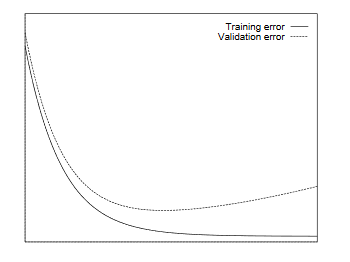

Sadly, this is almost never the case, as in reality error scores can fluctuate and create multiple local minima such as this example. 

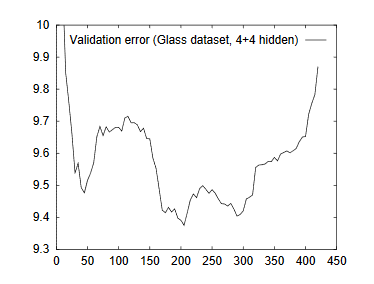

This is why Early Stopping is a thing, and it has multiple criteria for *when* to actually stop.
***
We won't go in detail about that in this notebook. For now, let us add **Early Stopping** to our model's callbacks.

In [7]:
estop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto')

This configuration of Early Stopping checks the validation loss at every epoch. If there has been no improvement for 4 epochs (dictated by the 'patience' argument), it stops training the model. 

In [8]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(8, 8)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2, callbacks=[estop])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 12s - loss: 1.5829 - acc: 0.4217 - val_loss: 1.2885 - val_acc: 0.5465
Epoch 2/40
 - 11s - loss: 1.2990 - acc: 0.5344 - val_loss: 1.1511 - val_acc: 0.6000
Epoch 3/40
 - 11s - loss: 1.1952 - acc: 0.5723 - val_loss: 1.0682 - val_acc: 0.6252
Epoch 4/40
 - 12s - loss: 1.1243 - acc: 0.5995 - val_loss: 1.0459 - val_acc: 0.6382
Epoch 5/40
 - 12s - loss: 1.0777 - acc: 0.6181 - val_loss: 1.0082 - val_acc: 0.6495
Epoch 6/40
 - 12s - loss: 1.0330 - acc: 0.6334 - val_loss: 1.0154 - val_acc: 0.6414
Epoch 7/40
 - 12s - loss: 1.0071 - acc: 0.6422 - val_loss: 0.9762 - val_acc: 0.6629
Epoch 8/40
 - 12s - loss: 0.9828 - acc: 0.6522 - val_loss: 0.9306 - val_acc: 0.6739
Epoch 9/40
 - 12s - loss: 0.9631 - acc: 0.6588 - val_loss: 0.9595 - val_acc: 0.6672
Epoch 10/40
 - 12s - loss: 0.9473 - acc: 0.6653 - val_loss: 0.9290 - val_acc: 0.6771
Epoch 11/40
 - 12s - loss: 0.9292 - acc: 0.6692 - val_loss: 0.9288 - val_acc: 0.6725
Epoch 12/40
 - 12s - los

#### We should've gotten similar results as the last model we trained. Only this time, our model went through significantly less epochs.

There is a possibility that our accuracy has dipped in comparison to the previous model which may indicate *too* early stopping.

Anyway, we need to go *deeper.*

Let's add more conv+pool layers! 

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2, callbacks=[estop])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 15s - loss: 1.6939 - acc: 0.3665 - val_loss: 1.5357 - val_acc: 0.4431
Epoch 2/40
 - 14s - loss: 1.3891 - acc: 0.4976 - val_loss: 1.2999 - val_acc: 0.5273
Epoch 3/40
 - 14s - loss: 1.2485 - acc: 0.5529 - val_loss: 1.2420 - val_acc: 0.5572
Epoch 4/40
 - 14s - loss: 1.1509 - acc: 0.5883 - val_loss: 1.1126 - val_acc: 0.6066
Epoch 5/40
 - 14s - loss: 1.0743 - acc: 0.6188 - val_loss: 1.0664 - val_acc: 0.6213
Epoch 6/40
 - 14s - loss: 1.0200 - acc: 0.6382 - val_loss: 1.0508 - val_acc: 0.6270
Epoch 7/40
 - 14s - loss: 0.9762 - acc: 0.6535 - val_loss: 0.9780 - val_acc: 0.6546
Epoch 8/40
 - 14s - loss: 0.9380 - acc: 0.6691 - val_loss: 1.0065 - val_acc: 0.6519
Epoch 9/40
 - 14s - loss: 0.9041 - acc: 0.6785 - val_loss: 1.0618 - val_acc: 0.6389
Epoch 10/40
 - 14s - loss: 0.8791 - acc: 0.6891 - val_loss: 0.9801 - val_acc: 0.6603
Epoch 11/40
 - 14s - loss: 0.8557 - acc: 0.6972 - val_loss: 0.9632 - val_acc: 0.6677
Epoch 12/40
 - 14s - los

#### What? I thought putting more layers in will automagically give us better results??

Not all the time, especially if you don't know what you're doing. Notice that, while the filter sizes for the conv layers were retained, the pool's filter sizes had to be adjusted in order to accomodate these extra conv layers. As we know, due to the nature of how convolution works, our output volume shrinks after every conv layer. On top of that, the output volume gets downsampled through the use of the max pooling layer. 

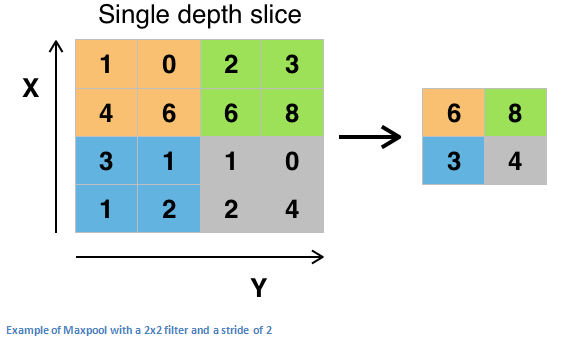

***

**Downsampling** isn't inherently a bad thing. In fact, it is really useful in what we're doing. First, it gives us less to work with, therefore making our data computationally more manageable. Second, it prevents overfitting, especially in the context of pooling, by generalizing certain regions in the image. 

***
In this case though, the output volume has become too small that it is possible that we have lost some valuable information that would be vital in classification.  

Let us attempt to remedy that by making our conv filters smaller.

In [10]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2, callbacks=[estop])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 14s - loss: 1.4696 - acc: 0.4639 - val_loss: 1.2370 - val_acc: 0.5586
Epoch 2/40
 - 13s - loss: 1.1015 - acc: 0.6078 - val_loss: 1.0066 - val_acc: 0.6496
Epoch 3/40
 - 13s - loss: 0.9458 - acc: 0.6666 - val_loss: 0.8772 - val_acc: 0.6888
Epoch 4/40
 - 13s - loss: 0.8543 - acc: 0.6994 - val_loss: 0.8257 - val_acc: 0.7134
Epoch 5/40
 - 13s - loss: 0.7793 - acc: 0.7281 - val_loss: 0.8259 - val_acc: 0.7140
Epoch 6/40
 - 13s - loss: 0.7301 - acc: 0.7434 - val_loss: 0.7918 - val_acc: 0.7211
Epoch 7/40
 - 13s - loss: 0.6881 - acc: 0.7590 - val_loss: 0.7565 - val_acc: 0.7413
Epoch 8/40
 - 13s - loss: 0.6558 - acc: 0.7694 - val_loss: 0.7646 - val_acc: 0.7374
Epoch 9/40
 - 13s - loss: 0.6186 - acc: 0.7802 - val_loss: 0.7409 - val_acc: 0.7523
Epoch 10/40
 - 13s - loss: 0.5912 - acc: 0.7901 - val_loss: 0.7722 - val_acc: 0.7452
Epoch 11/40
 - 13s - loss: 0.5615 - acc: 0.8032 - val_loss: 0.7316 - val_acc: 0.7538
Epoch 12/40
 - 13s - los

#### It works! Plus, it's accuracy has improved by ~4%! 

**What now?**
We can attempt to squeeze all the improvement possible from our current model because there is a chance that early stopping prematurely halts training before finding our loss's global minimum. 
***
Introducing the **ReduceLROnPlateau** callback! 
***
Instead of outright stopping our model's training, we can just reduce its learning rate so we can see less erratic loss and accuracy scores. Similar conditions from Early Stopping apply, as we only reduce LR after a certain number of epochs without improvement.

Let's replace early stopping for now and add LR reduction.

In [11]:
plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)

This configuration for LR reduction halves the learning rate after 5 epochs that exhibit no improvement. 

In [12]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2, callbacks=[plateau])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 14s - loss: 1.5069 - acc: 0.4520 - val_loss: 1.3220 - val_acc: 0.5278
Epoch 2/40
 - 13s - loss: 1.1569 - acc: 0.5888 - val_loss: 1.0333 - val_acc: 0.6376
Epoch 3/40
 - 13s - loss: 0.9856 - acc: 0.6529 - val_loss: 0.9336 - val_acc: 0.6706
Epoch 4/40
 - 13s - loss: 0.8808 - acc: 0.6904 - val_loss: 0.8648 - val_acc: 0.6931
Epoch 5/40
 - 13s - loss: 0.8046 - acc: 0.7163 - val_loss: 0.8572 - val_acc: 0.7023
Epoch 6/40
 - 13s - loss: 0.7455 - acc: 0.7347 - val_loss: 0.7943 - val_acc: 0.7232
Epoch 7/40
 - 13s - loss: 0.7036 - acc: 0.7532 - val_loss: 0.8055 - val_acc: 0.7242
Epoch 8/40
 - 13s - loss: 0.6662 - acc: 0.7654 - val_loss: 0.8130 - val_acc: 0.7173
Epoch 9/40
 - 13s - loss: 0.6374 - acc: 0.7726 - val_loss: 0.7660 - val_acc: 0.7359
Epoch 10/40
 - 13s - loss: 0.6021 - acc: 0.7861 - val_loss: 0.7484 - val_acc: 0.7434
Epoch 11/40
 - 13s - loss: 0.5771 - acc: 0.7937 - val_loss: 0.7657 - val_acc: 0.7403
Epoch 12/40
 - 13s - los

#### Another improvement! The catch was that we had to go through all the epochs since we took out early stopping. 

We can try improving our model further by adding classic fully connected layers.

Let's do that.

In [13]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=2, callbacks=[plateau])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 16s - loss: 1.6464 - acc: 0.3869 - val_loss: 1.3098 - val_acc: 0.5208
Epoch 2/40
 - 15s - loss: 1.2633 - acc: 0.5486 - val_loss: 1.1010 - val_acc: 0.6106
Epoch 3/40
 - 15s - loss: 1.1080 - acc: 0.6097 - val_loss: 1.0092 - val_acc: 0.6528
Epoch 4/40
 - 15s - loss: 0.9942 - acc: 0.6513 - val_loss: 0.9077 - val_acc: 0.6881
Epoch 5/40
 - 15s - loss: 0.9317 - acc: 0.6734 - val_loss: 0.8613 - val_acc: 0.7021
Epoch 6/40
 - 15s - loss: 0.8757 - acc: 0.6926 - val_loss: 0.8565 - val_acc: 0.7071
Epoch 7/40
 - 15s - loss: 0.8399 - acc: 0.7062 - val_loss: 0.8239 - val_acc: 0.7183
Epoch 8/40
 - 15s - loss: 0.8045 - acc: 0.7177 - val_loss: 0.8129 - val_acc: 0.7212
Epoch 9/40
 - 15s - loss: 0.7830 - acc: 0.7261 - val_loss: 0.7823 - val_acc: 0.7301
Epoch 10/40
 - 15s - loss: 0.7562 - acc: 0.7359 - val_loss: 0.7993 - val_acc: 0.7289
Epoch 11/40
 - 15s - loss: 0.7365 - acc: 0.7415 - val_loss: 0.7497 - val_acc: 0.7463
Epoch 12/40
 - 15s - los

#### It should have improved slightly. 
***

## Conclusion

While the Convolutional Neural Networks here perform relatively well in classifying CIFAR-10 images, it does not end here. There are a myriad of techniques and concepts that other data scientists are coming up with that either build upon CNNs or new classes of neural networks entirely. What was accomplished in this notebook is merely scratching the surface of image classification as there exists out there far better performing models than the ones I have come up with. 

These initial results pale in comparison to existing models, and so further research and study must be done in order to obtain a deeper understanding of the design and concept behind the aforementioned successful models.

#### References
***
Keras Documentation: 

https://keras.io

Adit Deshpande's "A Beginner's Guide To Understanding Convolutional Neural Networks": 

https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

Adit Deshpande's "The 9 Deep Learning Papers You Need to Know About":

https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html

Lutz Prechelt's "Early Stopping -- but when?": 

https://pdfs.semanticscholar.org/ea66/75caf8cdb9902e7889c0d75e8acc1c844b3d.pdf

Simonyan & Zisserman's "VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION" AKA the VGG Net paper:

https://arxiv.org/pdf/1409.1556v6.pdf

Hadrian Lim's "Convolutional Neural Networks with Keras": 

https://github.com/hadrianpaulo/neural-nets-tutorials/blob/master/%5BL4%5D%20CNN%20with%20TF%20and%20Keras.ipynb
